In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zplane as zplane_python  # For z-plane plotting

# Define symbolic variable
n = sp.Symbol('n')
z = sp.Symbol('z')

# Z-transform of a^n for a > 1
a = 2
x = a**n
x1 = sp.ztrans(x, n, z)
print('Z-transform of a^n where a > 1:')
print(x1)

# Z-transform of sin(n) for 0 < a < 1
a = 0.1
x = sp.sin(n)
x2 = sp.ztrans(x, n, z)
print('Z-transform of sin(n) where 0 < a < 1:')
print(x2)

# Inverse Z-transform of a^n for a > 1
x = a**n
inv1 = sp.iztrans(x, z, n)
print('Inverse Z-transform of a^n where a > 1:')
print(inv1)

# Inverse Z-transform of sin(n)
inv2 = sp.iztrans(x2, z, n)
print('Inverse Z-transform of sin(n) where 0 < a < 1:')
print(inv2)

# Plot ROC using zplane
plt.figure(figsize=(15, 5))

# Subplot 1: ROC for a > 1
plt.subplot(1, 3, 1)
zplane_python(np.array([1, 0]), np.array([1, -2]))
plt.title('ROC: a > 1')

# Subplot 2: ROC for 0 < a < 1
plt.subplot(1, 3, 2)
zplane_python(np.array([1, 0]), np.array([1, -0.5]))
plt.title('ROC: 0 < a < 1')

# Subplot 3: ROC for Quadratic Denominator
plt.subplot(1, 3, 3)
zplane_python(np.array([1, 0, 0]), np.array([1, -2, 1]))
plt.title('ROC: Quadratic Denominator')

plt.tight_layout()
plt.show()

ImportError: cannot import name 'zplane' from 'scipy.signal' (/Users/rahi/miniconda3/envs/ML/lib/python3.12/site-packages/scipy/signal/__init__.py)

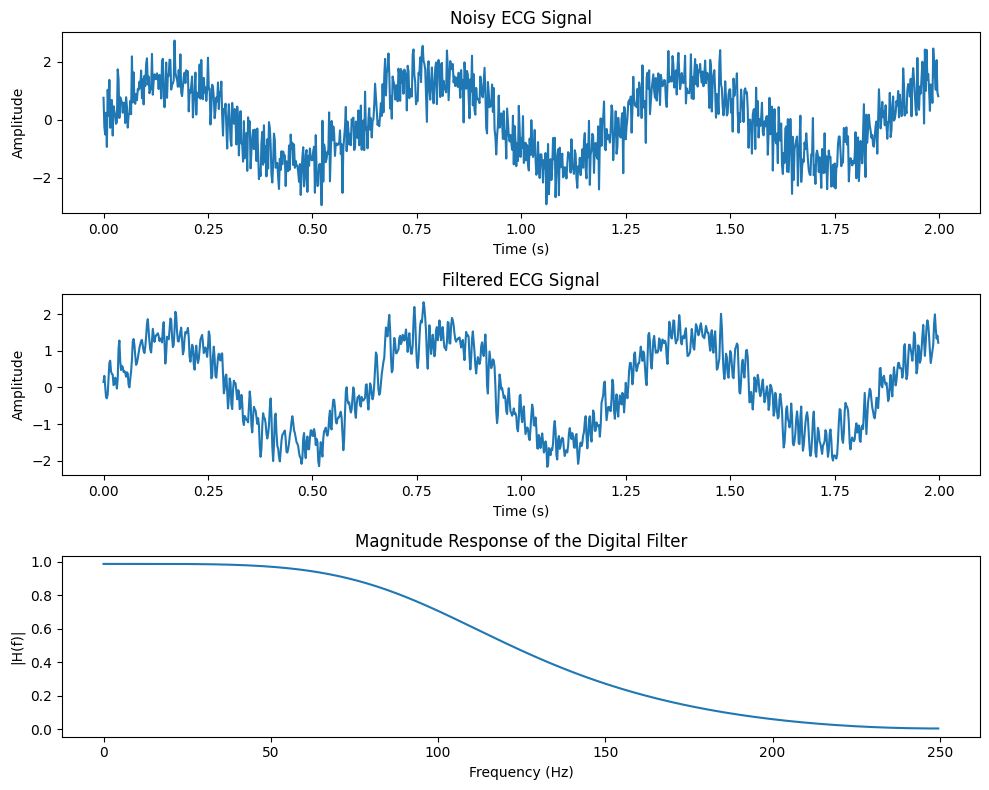

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Sampling frequency
fs = 500  

# Time vector
t = np.arange(0, 2, 1/fs)  

# Simulated ECG signal
ecg_clean = 1.5 * np.sin(2 * np.pi * 1.6 * t)

# High-frequency noise
noise = 0.6 * np.random.randn(len(t))

# Noisy ECG signal
ecg_noisy = ecg_clean + noise

# Plotting original and noisy ECG
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, ecg_noisy)
plt.title('Noisy ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Design and apply digital low-pass filter
# Numerator (FIR) coefficients
b = [0.2036, 0.4137, 0.2036]
# Denominator (IIR) coefficients
a = [1.0000, -0.3650, 0.1968]

# Filtering
ecg_filtered = lfilter(b, a, ecg_noisy)

# Plot filtered ECG signal
plt.subplot(3, 1, 2)
plt.plot(t, ecg_filtered)
plt.title('Filtered ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Frequency response of filter
w, H = freqz(b, a, worN=512, fs=fs)
plt.subplot(3, 1, 3)
plt.plot(w, np.abs(H))
plt.title('Magnitude Response of the Digital Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H(f)|')
plt.tight_layout()
plt.show()